In [100]:
# Install dependencies
# !pip install -r requirements.txt -- doesn't work

#cd into this directory in conda prompt after activating landscape env and do pip install -r requirements.txt
from pprint import pprint
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

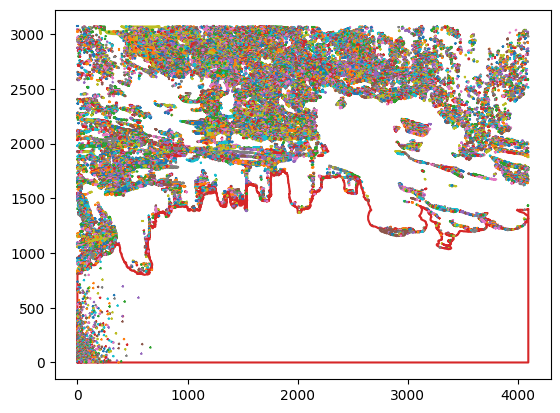

In [101]:
# FIND CONTOURS method (recommended along with Canny method for finding shapes)
# note that the contour is shown upside down here - there is example below how to flip

# Load image and convert to grayscale
image = cv2.imread('rock_formation.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply threshold to segment rock formations
# can play with 127 and 255 for different detections of disturbance
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the image
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Plot the contours
fig, ax = plt.subplots()
for contour in contours:
    ax.plot(contour[:, 0, 0], contour[:, 0, 1])

# Show the plot
plt.show()


In [102]:
######################
# Convert the image to a numpy array of pixel data
######################

# Load the image and convert to grayscal with 'L' for luminescance
# THIS 'L' MAKES IMAGE LESS POLKA DOTTY like it is above.  Makes colors simpler
image = Image.open('rock_formation.jpg').convert('L')
image = np.array(image)

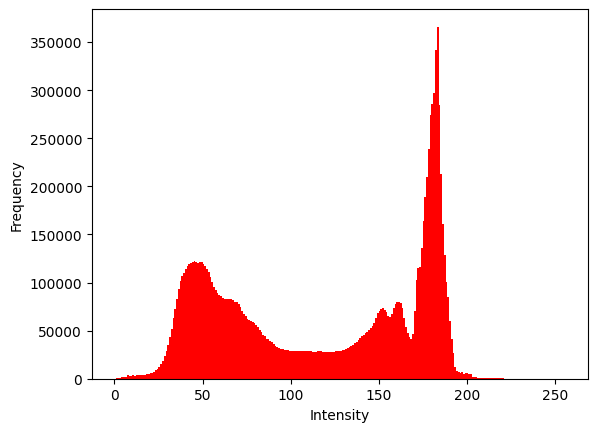

In [103]:
# SHOW A HISTOGRAM OF PIXEL FREQUENCY
hist, bins = np.histogram(image, bins=256, range=(0, 256))

# Plot the histogram using Matplotlib
plt.hist(image.flatten(), bins=256, range=(0, 256), color='r')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

edges = cv2.Canny(image, 100, 200)

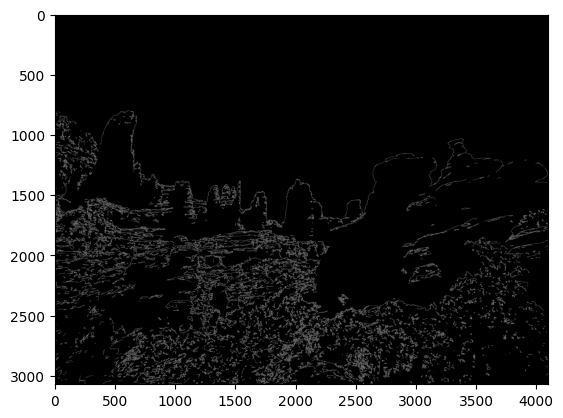

In [104]:
# USE CANNY FOR EDGE DETECTION AND SHOWING CONTOURS

##### THIS IS COOL AND GOOD!!! WORTH EXPLORING

# Load the image and convert to grayscal with 'L' for luminescance
image = Image.open('rock_formation.jpg').convert('L')
image = np.array(image)

# min and max thresholds integers - 
# the lower the max threshold, the more sensitive in picking up what could be edges
# min?
min_threshold = 200
max_threshold = 600
# array of edge data numbers
edges = cv2.Canny(image, min_threshold, max_threshold)

# TODO: Can we get the lowest y value for each x point and make a line from that?

# cmap can be different values like gray or plasma to show different styling of graph colors
plt.imshow(edges, cmap='gray')
plt.show()

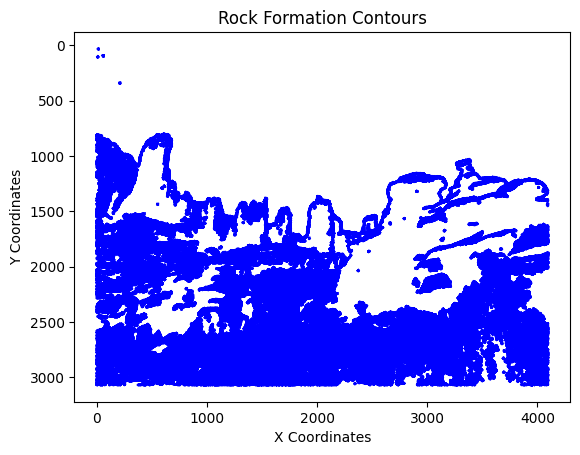

In [119]:
################# 
# LINE CHART  VERY COOL CLOSE TO GETTING A CONTOUR LINE!!
# USES FIND CONTOURS ALGORITHM
#################

# Load the image and extract the shape of the rock formation with findContours
#### THIS IS EFFECTIVE WAY TO LOAD IMAGE WITH LESS NOISE THAN SOME OF THE OTHER WAYS ####
img = cv2.imread('rock_formation.jpg',0)
edges = cv2.Canny(img, 100, 200)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Apply threshold to segment rock formations
# can play with 127 and 255 for different detections of disturbance
#_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# Find contours in the image
#contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a new figure and plot the contours
fig, ax = plt.subplots()
for i in range(len(contours)):
    # Extract x, y coordinates of the i-th contour
    x_coords = [c[0][0] for c in contours[i]]
    y_coords = [c[0][1] for c in contours[i]]
    
    # Plot the contour as a line
    ax.plot(x_coords, y_coords, linewidth=2, color='blue')

# Set the title and axis labels
ax.set_title('Rock Formation Contours')
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')

# FLIP THE GRAPH RIGHT SIDE UP FOR THE CONTOUR TO SHOW - without this it shows upside down!
# TODO: could be interesting to explore the inverse shapes of rocks by leaving this out!
ax.invert_yaxis()

# Show the plot
plt.show()


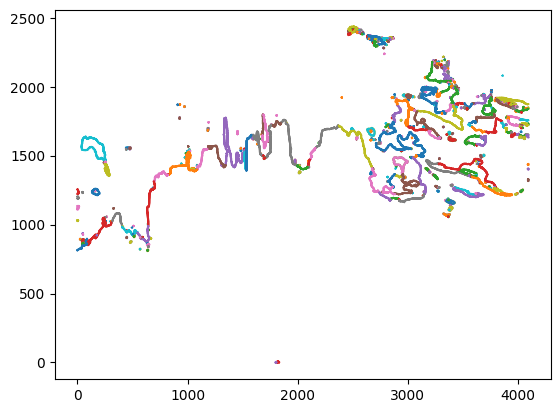

In [114]:
# FILTER OUT BLUE SKY BACKGROUND

image = cv2.imread("rock_formation.jpg")

# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range of blue color in HSV
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

# Threshold the HSV image to get only blue colors
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Apply a morphological closing operation to the mask to remove small holes in the blue regions
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
blue_mask_closed = cv2.morphologyEx(blue_mask, cv2.MORPH_CLOSE, kernel)

# Apply edge detection to the masked image to extract the contours of the rock formations
edges = cv2.Canny(blue_mask_closed, 100, 200)

# Extract the contours from the edges
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Plot the contours
fig, ax = plt.subplots()
for contour in contours:
    x_coords = []
    y_coords = []
    for point in contour:
        x_coords.append(point[0][0])
        y_coords.append(point[0][1])
    ax.plot(x_coords, y_coords)
plt.show()


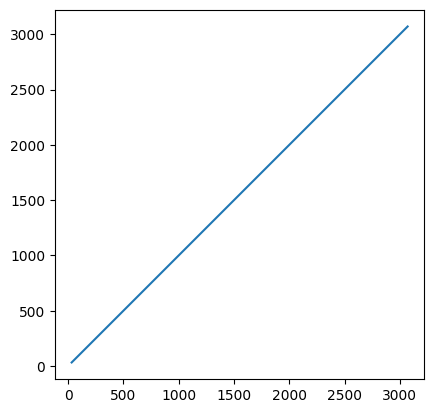

In [112]:
# Load the image and extract the shape of the rock formation
image = cv2.imread('rock_formation.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter out disconnected points
MIN_DISTANCE = 5
filtered_contours = []
for contour in contours:
    for i in range(1, len(contour)):
        distance = np.sqrt((contour[i][0][0] - contour[i-1][0][0])**2 + (contour[i][0][1] - contour[i-1][0][1])**2)
        if distance < MIN_DISTANCE:
            filtered_contours.append(contour[i])

# Convert the contour data to x, y coordinates
x_coords = [point[0][1] for point in filtered_contours]
y_coords = [point[0][1] for point in filtered_contours]


# Plot the x, y coordinates
fig, ax = plt.subplots()
ax.plot(x_coords, y_coords)
ax.set_aspect('equal')
plt.show()


[4004, 4004]


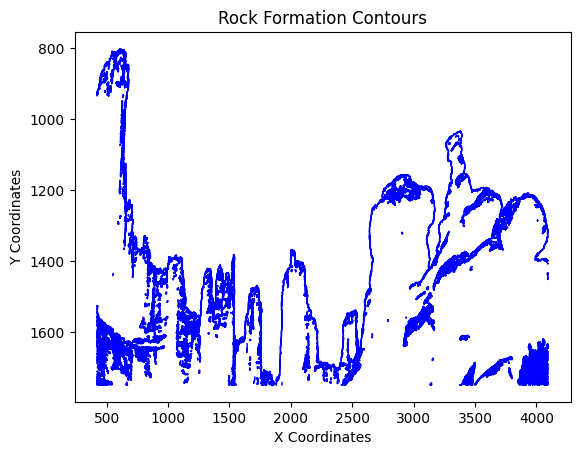

In [152]:
#####################
# LINE CHART WITH FILTERING OUT NOISE AND SINGLE DOTS IN SKY
# ADD CUTOFFS TO TAKE OUT X AND Y PORTIONS
#####################


img = cv2.imread('rock_formation.jpg',0)
edges = cv2.Canny(img, 100, 200)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

fig, ax = plt.subplots()

# see docs for heirarchy: https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html
printed = False
for i in range(len(contours)):
    # Calculate the length of each contour segment
    segment_lengths = [cv2.arcLength(contours[i][j:j+2], closed=False) for j in range(len(contours[i])-1)]
    
    # Filter out short segments - 5 is decent for filtering out the dots
    filter_len = 0
    filtered_indices = [j for j in range(len(segment_lengths)) if segment_lengths[j] > filter_len]
    filtered_contours = contours[i][filtered_indices]
    
    # filtered_contours: [ [[ 800 3066 ]], [[ 333 4444 ]] ]

    
    # try to remove portions to isolate the contour line
    x_cutoff = 420
    y_cutoff = 1750
    
    # Extract x, y coordinates of the filtered contour
    x_coords = [c[0][0] for c in filtered_contours if c[0][0] > x_cutoff and c[0][1] < y_cutoff] # [1425]
    y_coords = [c[0][1] for c in filtered_contours if c[0][0] > x_cutoff and c[0][1] < y_cutoff]

    
    # Plot the contour as a line
    ax.plot(x_coords, y_coords, linewidth=1, color='blue')
    
    if printed is False and len(x_coords) > 0:
        pprint(x_coords)
        printed = True
        

ax.set_title('Rock Formation Contours')
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.invert_yaxis()

plt.show()


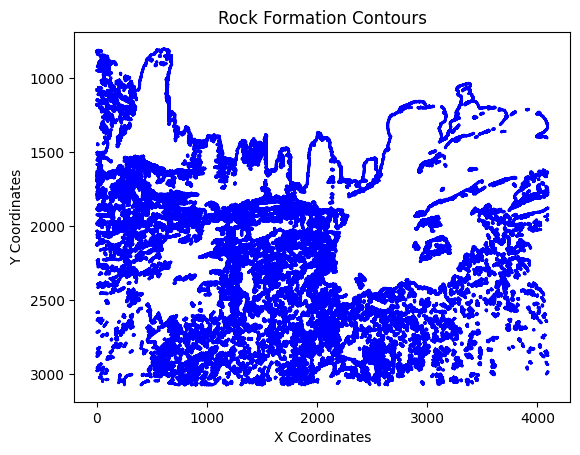

In [2]:
# Getting line chart without filters using the Canny algo to get the edges.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image and convert it to grayscale
image = cv2.imread('rock_formation.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect edges using the Canny algorithm
min_threshold = 200
max_threshold = 600
edges = cv2.Canny(gray, min_threshold, max_threshold)

# Find the contours in the image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a new figure and plot the contours as line graphs
fig, ax = plt.subplots()
for i in range(len(contours)):
    # Extract x, y coordinates of the i-th contour
    x_coords = [c[0][0] for c in contours[i]]
    y_coords = [c[0][1] for c in contours[i]]
    
    # Plot the contour as a line
    ax.plot(x_coords, y_coords, linewidth=2, color='blue')

ax.set_title('Rock Formation Contours')
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')

ax.invert_yaxis()

plt.show()


In [10]:
# Rough first run of getting line chart of highest y points - leaving for reference and notes.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image and convert it to grayscale
image = cv2.imread('rock_formation.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect edges using the Canny algorithm
min_threshold = 200
max_threshold = 600
edges = cv2.Canny(gray, min_threshold, max_threshold)

# Find the contours in the image
# contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# # Create a new figure and plot the contours as line graphs
# fig, ax = plt.subplots()
# for i in range(len(contours)):
#     # Extract x, y coordinates of the i-th contour
#     x_coords = [c[0][0] for c in contours[i]]
#     y_coords = [c[0][1] for c in contours[i]]
    
#     # Find the highest y-coordinate for each x-coordinate
#     x_y_coords = dict()
#     for x, y in zip(x_coords, y_coords):
#         if x not in x_y_coords or y > x_y_coords[x]:
#             x_y_coords[x] = y
    
#     # Plot the contour as a line
#     ax.plot(x_coords, y_coords, linewidth=2, color='blue')
    
#     # Plot the highest y-coordinate for each x-coordinate as a red dot
#     for x, y in x_y_coords.items():
#         ax.plot(x, y, 'ro')
        
# improved efficiency
# Create a list to store the stacked data
stacked_data = []

# Loop through each column of the image and find the highest contour for each column
for i in range(edges.shape[1]):
    # Get the indices of the points in the current column
    column_indices = np.where(edges[:, i] != 0)[0]

    # Check if there are any points in the current column
    if len(column_indices) > 0:
        # Get the y-coordinates of the points in the current column
        column_coords = column_indices[::-1]

        # Find the index of the highest point in the column
        max_index = np.argmax(column_coords)

        # Slice the column to include only the highest points
        stacked_data.append(column_coords[max_index:])

        
######
# edges.shape[1] returns the second element of the shape attribute, which represents the number of columns (width) in the image. 
# This is because the shape attribute of a 2D array is (num_rows, num_cols).
#####
# Initialize stacked_data list
# stacked_data = []

# # Iterate over each x coordinate and get the highest y coordinate
# for x in range(edges.shape[1]):
#     ys = [contours[i][j][0][1] for i in range(len(contours)) for j in range(len(contours[i])) if contours[i][j][0][0] == x]
#     if ys:
#         max_y = max(ys)
#         stacked_data.append([max_y - y for y in range(max_y)])
#     else:
#         stacked_data.append([])

highest_points = [(x, np.min(column)) for x, column in enumerate(stacked_data) if column.size > 0]


        
# highest_points = []
# for x in range(len(stacked_data)):
#     column = stacked_data[x]
#     if column:
#         highest_points.append((x, min(column)))
        
# Plot the highest points as red dots
for point in highest_points:
    ax.plot(point[0], point[1], 'ro', markersize=8)
        
ax.set_title('Rock Formation Contours')
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')

ax.invert_yaxis()

plt.show()


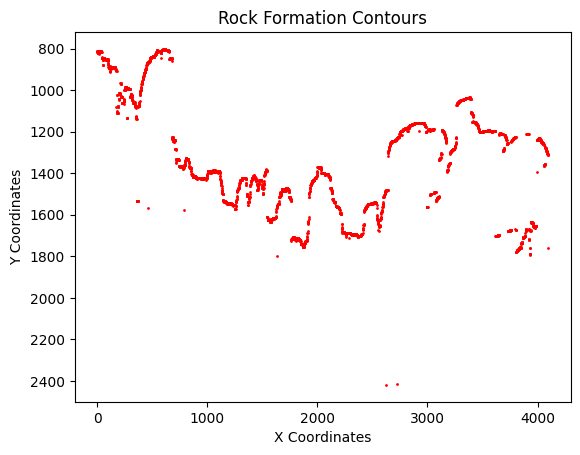

In [15]:
################################
# Close to what we want with the line chart, but the contour of some of the rocks goes backwards on x plane.
#
################################

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image and convert it to grayscale
image = cv2.imread('rock_formation.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect edges using the Canny algorithm
min_threshold = 200
max_threshold = 600
edges = cv2.Canny(gray, min_threshold, max_threshold)

stacked_data = []

# Loop through each column of the image and find the highest contour for each column
for i in range(edges.shape[1]):
    # Get the indices of the points in the current column
    column_indices = np.where(edges[:, i] != 0)[0]

    # Check if there are any points in the current column
    if len(column_indices) > 0:
        # Get the y-coordinates of the points in the current column
        column_coords = column_indices[::-1]

        # Find the index of the highest point in the column
        max_index = np.argmax(column_coords)

        # Slice the column to include only the highest points
        stacked_data.append(column_coords[max_index:])

fig, ax = plt.subplots()

highest_points = [(x, np.min(column)) for x, column in enumerate(stacked_data) if column.size > 0]

for point in highest_points:
    ax.plot(point[0], point[1], 'ro', markersize=1)
        
ax.set_title('Rock Formation Contours')
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')

ax.invert_yaxis()

plt.show()


In [ ]:
# could try filling in points where there are gaps.  Take the last point and fill in to the next point. based on trajectory?